Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

Step 2: Load and Explore the Data

In [3]:
# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display statistical summary of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Step 3: Data Preprocessing
Handle Categorical Variables

In [4]:
# Encode categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

# Drop unnecessary columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


Feature Scaling

In [5]:
# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 4: Model Building and Evaluation

Logistic Regression

In [6]:
# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
Accuracy: 0.811
ROC AUC Score: 0.5805960247074267
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Random Forest

In [7]:
# Initialize and train the model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.8655
ROC AUC Score: 0.7154283660385305
[[1547   60]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Gradient Boosting

In [8]:
# Initialize and train the model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
Accuracy: 0.8675
ROC AUC Score: 0.7243619280153146
[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



Step 5: Model Comparison and Conclusion

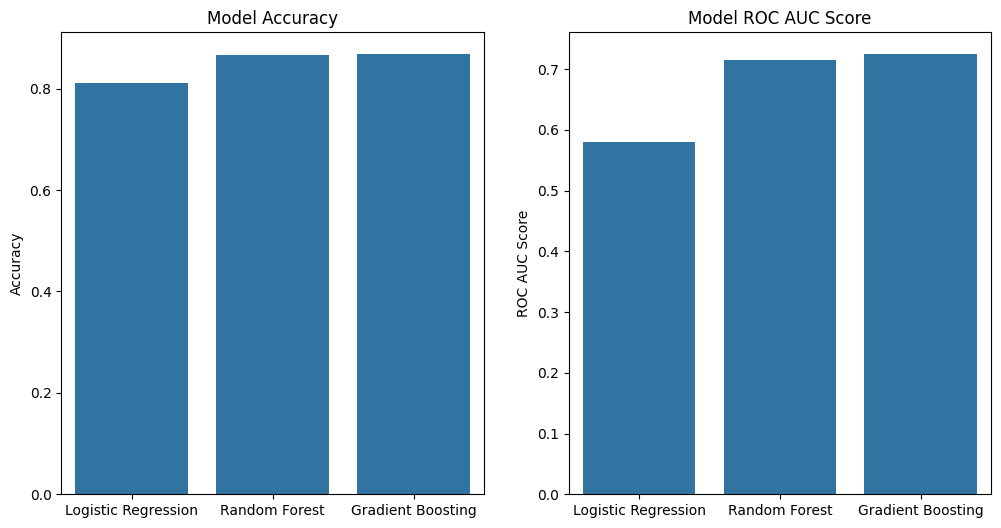

Based on the evaluation metrics, Gradient Boosting Classifier seems to perform the best in terms of accuracy and ROC AUC Score.


In [9]:
# Compare the models
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy_score(y_test, y_pred_log_reg),
                   accuracy_score(y_test, y_pred_rf),
                   accuracy_score(y_test, y_pred_gb)]

roc_auc_scores = [roc_auc_score(y_test, y_pred_log_reg),
                  roc_auc_score(y_test, y_pred_rf),
                  roc_auc_score(y_test, y_pred_gb)]

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x=models, y=accuracy_scores, ax=ax[0])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')

sns.barplot(x=models, y=roc_auc_scores, ax=ax[1])
ax[1].set_title('Model ROC AUC Score')
ax[1].set_ylabel('ROC AUC Score')

plt.show()

# Conclusion
print("Based on the evaluation metrics, Gradient Boosting Classifier seems to perform the best in terms of accuracy and ROC AUC Score.")
